In [12]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
DS= pd.read_csv('data_salaries.csv')
DS.head(10)




##identify which one's continuous which one's discrete, which one's categorical




,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


The dataset above are the first 10 people of the dataset. An example of instance would be the person at row 9 across different features like work year, experience level earning 147100 in US dollars.

In [65]:
pd.reset_option('display.max_colwidth')
group_names = DS.apply(lambda x: x.unique())
print(group_names)








work_year                                      [2023, 2022, 2020, 2021]
experience_level                                       [SE, MI, EN, EX]
employment_type                                        [FT, CT, FL, PT]
job_title             [Principal Data Scientist, ML Engineer, Data S...
salary                [80000, 30000, 25500, 175000, 120000, 222200, ...
salary_currency       [EUR, USD, INR, HKD, CHF, GBP, AUD, SGD, CAD, ...
salary_in_usd         [85847, 30000, 25500, 175000, 120000, 222200, ...
employee_residence    [ES, US, CA, DE, GB, NG, IN, HK, PT, NL, CH, C...
remote_ratio                                               [100, 0, 50]
company_location      [ES, US, CA, DE, GB, NG, IN, HK, NL, CH, CF, F...
company_size                                                  [L, S, M]
dtype: object


In [66]:
missing_data = DS.isna().sum().to_frame()
print(missing_data)


                    0
work_year           0
experience_level    0
employment_type     0
job_title           0
salary              0
salary_currency     0
salary_in_usd       0
employee_residence  0
remote_ratio        0
company_location    0
company_size        0


work_year, remote_ratio are discrete numerical data
salary, salary_in_usd are continous numerical data
experience_level, company_size are ordinal categorical data
employment_type, employee_residence, company_location are nominial categorical data

/var/folders/yc/h7c5cr_n22g4pbclbk8zpklc0000gr/T/ipykernel_20666/1312524493.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


The mean of Salary in US dollar is: 137570.39
The standard deviation of Salary in US dollar is: 63055.63


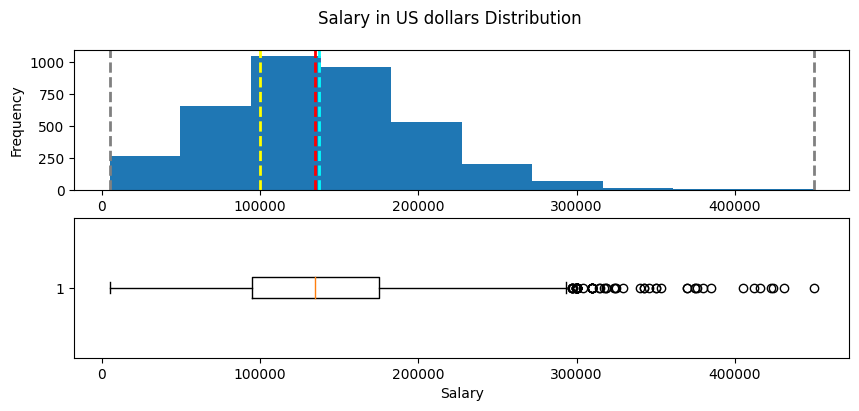

In [94]:
#Bar Chart for Salary_in USD
salary=DS['salary_in_usd']
min_salary = salary.min()
max_salary = salary.max()
med_salary = salary.median()
mod_salary = salary.mode()[0]
mean_salary=DS['salary_in_usd'].mean()
std_salary=DS['salary_in_usd'].std()

fig, ax=plt.subplots(2,1,figsize=(10,4))
ax[0].hist(salary)
ax[0].axvline(x=min_salary, color = 'gray', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=mean_salary, color = 'cyan', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=med_salary, color = 'red', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=mod_salary, color = 'yellow', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=max_salary, color = 'gray', linestyle='dashed', linewidth = 2)


ax[0].set_xlabel('salary')
ax[0].set_ylabel('Frequency')

ax[1].boxplot(salary, vert=False)
ax[1].set_xlabel('Salary')
fig.suptitle('Salary in US dollars Distribution')

fig.show()



print(f"The mean of Salary in US dollar is: {mean_salary:.2f}")
print(f"The standard deviation of Salary in US dollar is: {std_salary:.2f}")


work_year
2020     92302.631579
2021     94087.208696
2022    133338.620793
2023    149045.541176
Name: salary_in_usd, dtype: float64
experience_level
EN     78546.284375
EX    194930.929825
MI    104525.939130
SE    153051.071542
Name: salary_in_usd, dtype: float64
employment_type
CT    113446.900000
FL     51807.800000
FT    138314.199570
PT     39533.705882
Name: salary_in_usd, dtype: float64
remote_ratio
0      144316.202288
50      78400.687831
100    136481.452830
Name: salary_in_usd, dtype: float64


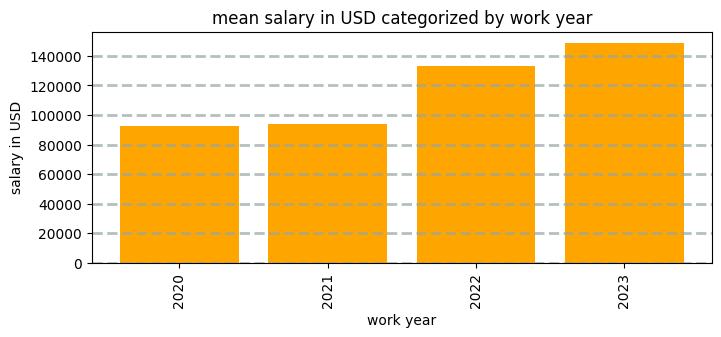

([0, 1, 2], [Text(0, 0, '100%'), Text(1, 0, '50%'), Text(2, 0, '0%')])

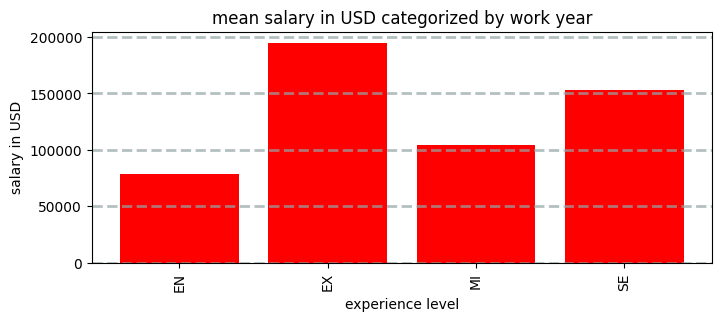

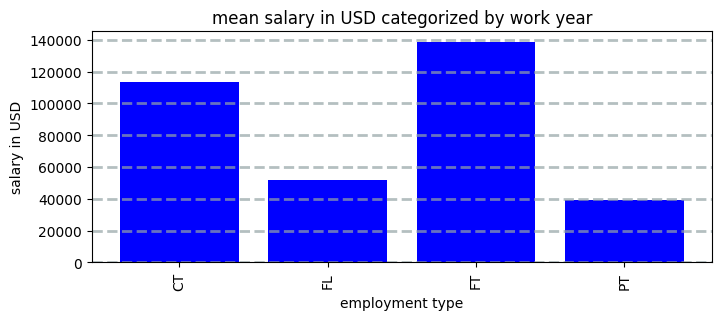

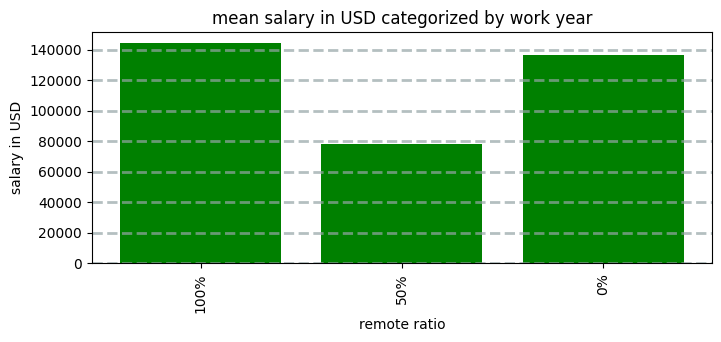

In [87]:

Salaries_by_WY = DS.groupby(['work_year'])['salary_in_usd'].mean()
Salaries_by_EL = DS.groupby(['experience_level'])['salary_in_usd'].mean()
Salaries_by_ET = DS.groupby(['employment_type'])['salary_in_usd'].mean()
Salaries_by_RR = DS.groupby(['remote_ratio'])['salary_in_usd'].mean()

print(Salaries_by_WY)
print(Salaries_by_EL)
print(Salaries_by_ET)
print(Salaries_by_RR)

fig = plt.figure(figsize=(8,3))
plt.bar(x=['2020','2021','2022','2023'], height=Salaries_by_WY, color='orange')
plt.title('mean salary in USD categorized by work year')
plt.xlabel('work year')
plt.ylabel('salary in USD')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

plt.show()

fig = plt.figure(figsize=(8,3))
plt.bar(x=['EN','EX','MI','SE'], height=Salaries_by_EL, color='red')
plt.title('mean salary in USD categorized by work year')
plt.xlabel('experience level')
plt.ylabel('salary in USD')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

fig = plt.figure(figsize=(8,3))
plt.bar(x=['CT','FL','FT','PT'], height=Salaries_by_ET, color='blue')
plt.title('mean salary in USD categorized by work year')
plt.xlabel('employment type')
plt.ylabel('salary in USD')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

fig = plt.figure(figsize=(8,3))
plt.bar(x=['100%','50%','0%'], height=Salaries_by_RR, color='green')
plt.title('mean salary in USD categorized by work year')
plt.xlabel('remote ratio')
plt.ylabel('salary in USD')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

## next make bar graph of these means
## Turn categorical data into one-hot encoding
## find anomalies



## demonstration of how mean salary in each category looks like